In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn.metrics as sklm

In [2]:
data=pd.read_csv("E:/DS PROJECT/HOME LOAN/train.csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [4]:
data.shape

(614, 13)

In [5]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


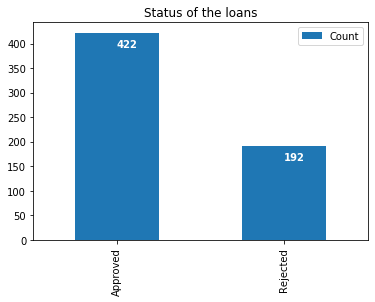

In [6]:
Approved = data[data['Loan_Status'] == 'Y']['Loan_Status'].count()
Rejected = data[data['Loan_Status'] == 'N']['Loan_Status'].count()
df = {"Count" : [Approved, Rejected]}
Status = pd.DataFrame(df, index=["Approved", "Rejected"])
ax = Status.plot(kind = 'bar', title = 'Status of the loans')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height() - 30), color = 'white', fontweight = 'bold')

In [7]:
print('The percentage of approved loans : %.2f' % (data['Loan_Status'].value_counts()[0] / len(data)))
print('The percentage of rejected loans : %.2f' % (data['Loan_Status'].value_counts()[1] / len(data)))

The percentage of approved loans : 0.69
The percentage of rejected loans : 0.31


In [8]:
data.isnull().sum().sort_values(ascending = False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_Status           0
Property_Area         0
CoapplicantIncome     0
ApplicantIncome       0
Education             0
Loan_ID               0
dtype: int64

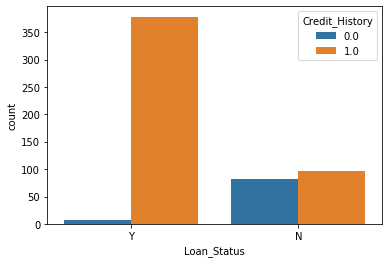

In [9]:
sns.countplot(data['Loan_Status'],hue=data['Credit_History'])

In [10]:
print(pd.crosstab(data['Credit_History'],data['Loan_Status']))

Loan_Status      N    Y
Credit_History         
0.0             82    7
1.0             97  378


In [11]:
print('The percentage of credit history yes : %.2f' % (data['Credit_History'].value_counts()[1] / len(data)))
print('The percentage of credit history no : %.2f' % (data['Credit_History'].value_counts()[0] / len(data)))

The percentage of credit history yes : 0.77
The percentage of credit history no : 0.14


In [12]:
data['Credit_History'] = data['Credit_History'].fillna(1)
data.isnull().sum().sort_values(ascending = False)

Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_Status           0
Property_Area         0
Credit_History        0
CoapplicantIncome     0
ApplicantIncome       0
Education             0
Loan_ID               0
dtype: int64

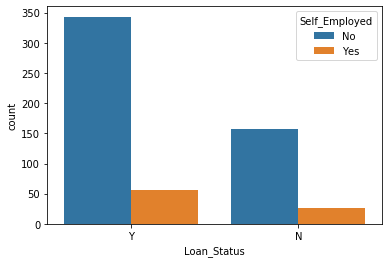

In [13]:
sns.countplot(data['Loan_Status'],hue=data['Self_Employed'])

In [14]:
data['Self_Employed'] = data['Self_Employed'].fillna('No')
data.isnull().sum().sort_values(ascending = False)

LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_Status           0
Property_Area         0
Credit_History        0
CoapplicantIncome     0
ApplicantIncome       0
Self_Employed         0
Education             0
Loan_ID               0
dtype: int64

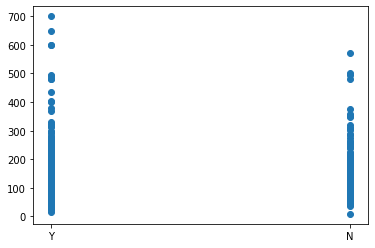

In [15]:
plt.scatter(data['Loan_Status'], data['LoanAmount'])


In [16]:
data['LoanAmount'] = data['LoanAmount'].fillna( data['LoanAmount'].mean())
data.isnull().sum().sort_values(ascending = False)

Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_Status           0
Property_Area         0
Credit_History        0
LoanAmount            0
CoapplicantIncome     0
ApplicantIncome       0
Self_Employed         0
Education             0
Loan_ID               0
dtype: int64

In [17]:
data.dropna(inplace = True)
data.shape

(573, 13)

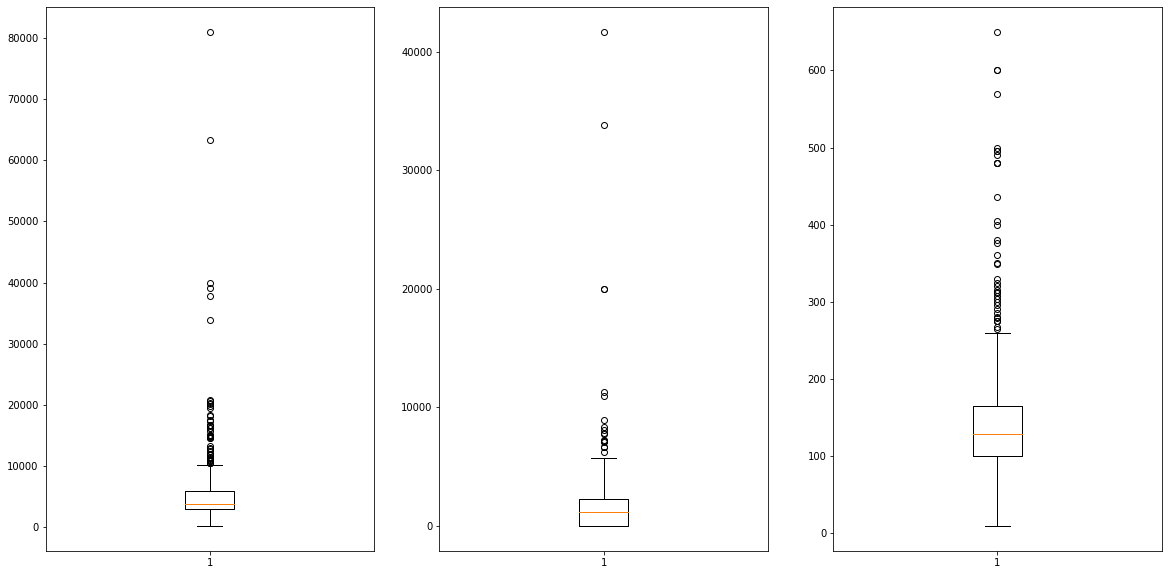

In [18]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (20,10))
ax1.boxplot(data['ApplicantIncome'])
ax2.boxplot(data['CoapplicantIncome'])
ax3.boxplot(data['LoanAmount'])
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x259d2264ba8>,
 'caps': [<matplotlib.lines.Line2D at 0x259d2264ef0>,
 'boxes': [<matplotlib.lines.Line2D at 0x259d22647b8>],
 'medians': [<matplotlib.lines.Line2D at 0x259d226f978>],
 'fliers': [<matplotlib.lines.Line2D at 0x259d226fcc0>],
 'means': []}

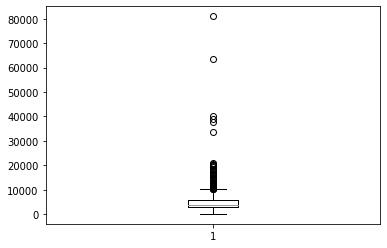

In [19]:
plt.boxplot(data['ApplicantIncome'])

In [20]:
outliers = data[data['ApplicantIncome'] > 50000]
outliers.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
333,LP002101,Male,Yes,0,Graduate,No,63337,0.0,490.0,180.0,1.0,Urban,Y
409,LP002317,Male,Yes,3+,Graduate,No,81000,0.0,360.0,360.0,0.0,Rural,N


{'whiskers': [<matplotlib.lines.Line2D at 0x259d22cc940>,
 'caps': [<matplotlib.lines.Line2D at 0x259d22ccdd8>,
 'boxes': [<matplotlib.lines.Line2D at 0x259d22cc588>],
 'medians': [<matplotlib.lines.Line2D at 0x259d22da710>],
 'fliers': [<matplotlib.lines.Line2D at 0x259d22daa58>],
 'means': []}

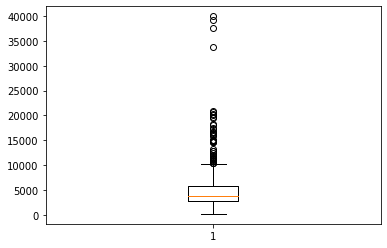

In [21]:
data = data[data['ApplicantIncome'] < 50000]
plt.boxplot(data['ApplicantIncome'])

In [22]:
outliers = data[data['ApplicantIncome'] > 25000]
outliers.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
155,LP001536,Male,Yes,3+,Graduate,No,39999,0.0,600.0,180.0,0.0,Semiurban,Y
183,LP001637,Male,Yes,1,Graduate,No,33846,0.0,260.0,360.0,1.0,Semiurban,N
185,LP001640,Male,Yes,0,Graduate,Yes,39147,4750.0,120.0,360.0,1.0,Semiurban,Y
443,LP002422,Male,No,1,Graduate,No,37719,0.0,152.0,360.0,1.0,Semiurban,Y


In [23]:
#making all columns numeric
data['Loan_Status'] = np.where((data['Loan_Status'] == 'Y'), 1, 0)

In [24]:
data.drop('Loan_ID', axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 571 entries, 0 to 613
Data columns (total 12 columns):
Gender               571 non-null object
Married              571 non-null object
Dependents           571 non-null object
Education            571 non-null object
Self_Employed        571 non-null object
ApplicantIncome      571 non-null int64
CoapplicantIncome    571 non-null float64
LoanAmount           571 non-null float64
Loan_Amount_Term     571 non-null float64
Credit_History       571 non-null float64
Property_Area        571 non-null object
Loan_Status          571 non-null int32
dtypes: float64(4), int32(1), int64(1), object(6)
memory usage: 55.8+ KB


In [25]:
data['Married'] = np.where((data['Married'] == 'Yes'), 1, 0)
data['Gender'] = np.where((data['Gender'] == 'Female'), 1, 0)
data['Education'] = np.where((data['Education'] == 'Graduate'), 1, 0)
data['Self_Employed'] = np.where((data['Self_Employed'] == 'Yes'), 1, 0)
data['Dependents'] = np.where((data['Dependents'] == '0'), 0, 1)

In [26]:
def f(row):
  if row['Property_Area'] == "Rural":
    val = 1
  elif row['Property_Area'] == "Urban":
    val = 0
  else:
    val = 2
  return val

data['Property_Area'] = data.apply(f, axis=1)


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 571 entries, 0 to 613
Data columns (total 12 columns):
Gender               571 non-null int32
Married              571 non-null int32
Dependents           571 non-null int32
Education            571 non-null int32
Self_Employed        571 non-null int32
ApplicantIncome      571 non-null int64
CoapplicantIncome    571 non-null float64
LoanAmount           571 non-null float64
Loan_Amount_Term     571 non-null float64
Credit_History       571 non-null float64
Property_Area        571 non-null int64
Loan_Status          571 non-null int32
dtypes: float64(4), int32(6), int64(2)
memory usage: 44.6 KB


In [28]:
X = data.iloc[:,0:11]   
y = data.iloc[:,-1] 

[0.02062566 0.01853748 0.03743508 0.03031956 0.01925627 0.21215395
 0.12763255 0.18897496 0.05521778 0.24702135 0.04282536]


C:\Users\manish chetlapally\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


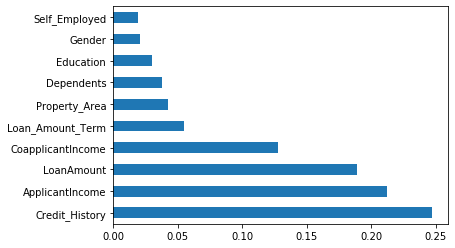

In [29]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [30]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Name of the column','Score'] 
print(featureScores.nlargest(10,'Score'))  

   Name of the column         Score
6   CoapplicantIncome  13836.533023
5     ApplicantIncome    263.335634
7          LoanAmount     93.339569
9      Credit_History     18.763822
10      Property_Area      4.362055
1             Married      2.073582
3           Education      0.595530
0              Gender      0.324309
4       Self_Employed      0.289648
8    Loan_Amount_Term      0.089362


In [32]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


from sklearn.linear_model import LogisticRegression

In [34]:
from sklearn.model_selection import train_test_split
X_4 = data[['Credit_History', 'CoapplicantIncome', 'Married', 'Property_Area']] 
y = data.iloc[:,-1]   
X_train, X_test, y_train, y_test= train_test_split(X_4,y, test_size=0.3 , random_state = 25)

In [35]:
print('Shape of X_train is: ', X_train.shape)
print('Shape of X_test is: ', X_test.shape)
print('Shape of Y_train is: ', y_train.shape)
print('Shape of y_test is: ', y_test.shape)

Shape of X_train is:  (399, 4)
Shape of X_test is:  (172, 4)
Shape of Y_train is:  (399,)
Shape of y_test is:  (172,)


In [36]:
print('The % approved status versus not approved in original_data :',data['Loan_Status'].value_counts().values/ len(data))
print('\nThe % approved status versus not approved in y_train :',y_train.value_counts().values/ len(y_train))
print('\nThe % approved status versus not approved in in y_test :',y_test.value_counts().values/ len(y_test))

The % approved status versus not approved in original_data : [0.69527145 0.30472855]

The % approved status versus not approved in y_train : [0.69423559 0.30576441]

The % approved status versus not approved in in y_test : [0.69767442 0.30232558]


In [39]:
def score_model(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probs[:,1]])

def print_metrics(labels, probs, threshold):
    scores = score_model(probs, threshold)
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score positive    Score negative')
    print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('DETAILS ACCURACY, PRECISION AND RECALL')
    print('Accuracy        %0.2f' % sklm.accuracy_score(labels, scores))
    print('AUC             %0.2f' % sklm.roc_auc_score(labels, probs[:,1]))
    print('Macro precision %0.2f' % float((float(metrics[0][0]) + float(metrics[0][1]))/2.0))
    print('Macro recall    %0.2f' % float((float(metrics[1][0]) + float(metrics[1][1]))/2.0))
    print(' ')
    print('           Positive      Negative')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])


In [46]:
D_tree = DecisionTreeClassifier(max_depth = 3)
D_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [47]:
prob_D = D_tree.predict_proba(X_test)
print_metrics(y_test, prob_D, 0.3)

                 Confusion matrix
                 Score positive    Score negative
Actual positive        18                34
Actual negative         1               119

DETAILS ACCURACY, PRECISION AND RECALL
Accuracy        0.80
AUC             0.67
Macro precision 0.86
Macro recall    0.67
 
           Positive      Negative
Num case       52           120
Precision    0.95          0.78
Recall       0.35          0.99
F1           0.51          0.87
